# 환율 예측 모델링

In [85]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_CPU()
from preprocessing_KK import *
from preprocessing_project_KK import *
from preprocessing_text_KK import * ##
from description_KK import *
from algorithm_textmining_KK import * ##
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from evaluation_project_KK import *
from visualization_KK import *

Cuda is Ready?  False

Tensorflow Version:  2.18.0
Keras Version:  3.7.0
Torch Version:  2.5.1+cpu


# Result

In [86]:
# Hyperparameters
METRIC_COLNAMES = ["RMSE", "MSPE", "MAE", "MAPE", "MedAE", "MedAPE"]
LABEL_COLNAME = "Model & Feature Case"
SCALING = True
TOP_RANKING = 10

In [87]:
# Data Loading
file_location = os.path.join('.', 'Result', 'PerformanceEvaluation.xlsx')
df = pd.read_excel(file_location, sheet_name='Raw')
df['Model & Feature Case'] = df.Model + ' & ' + df['Feature Case']

Top 10 by Radar Area:


,Model & Feature Case,Area of Radar
0,CNN_LSTM & Macro + Sentiment(Direct+Indirect),1.6537
1,CNN_GRU & Macro + Event,1.6168
2,CNN_GRU & Macro + Sentiment(Direct),1.6074
3,CNN_LSTM & Macro + Sentiment(Direct),1.5046
4,CNN_LSTM & Macro + Event + Sentiment(Direct),1.3825
5,CNN_LSTM & Macro + Event,1.2749
6,LSTM & Macro + Sentiment(Direct),1.2105
7,CNN_GRU & Macro + Event + Sentiment(Direct),1.1910
8,CNN_LSTM & Macro + Sentiment(All),1.1842
9,CNN_LSTM & Macro + Event + Sentiment(Direct+Indirect),1.1735


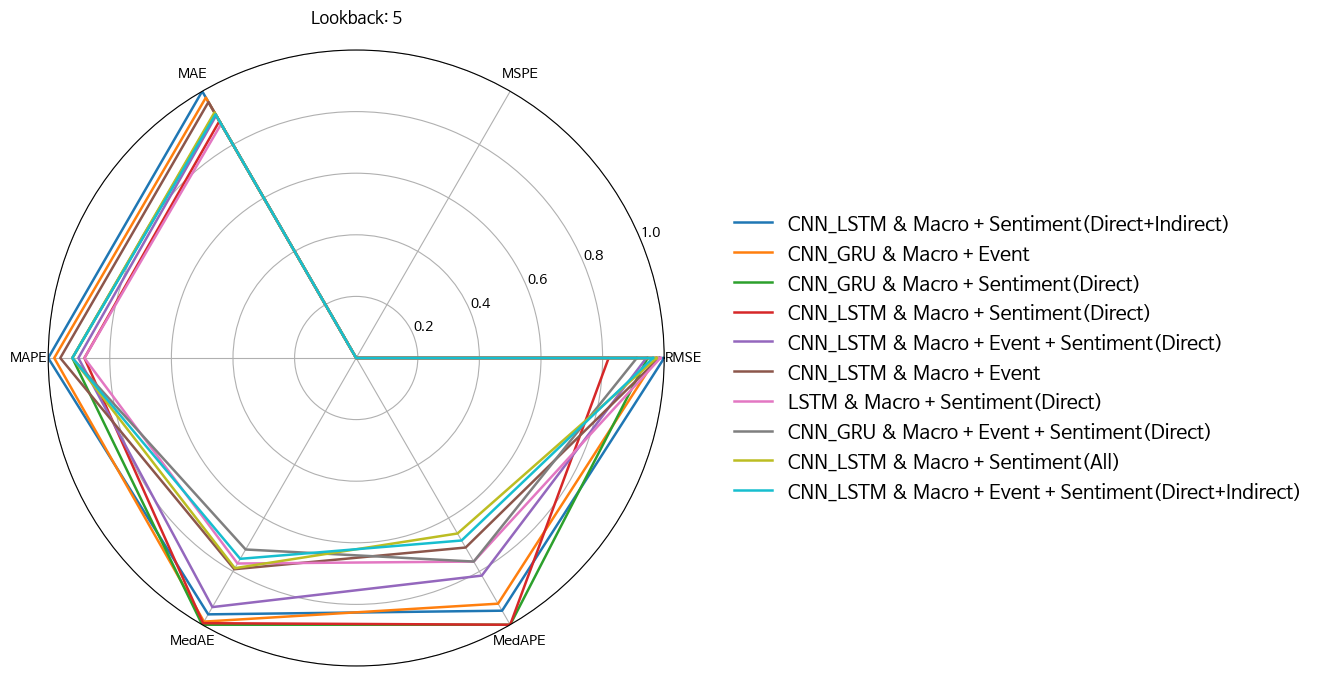

Top 10 by Radar Area:


,Model & Feature Case,Area of Radar
0,CNN_LSTM & Macro + Sentiment(Direct+Indirect),1.5250
1,CNN_GRU & Macro + Event,1.5237
2,CNN_GRU & Macro + Event + Sentiment(Direct),1.4820
3,CNN_GRU & Macro Only,1.3381
4,CNN_LSTM & Macro + Event + Sentiment(Direct),1.3191
5,LSTM & Macro + Event,1.1421
6,CNN_LSTM & Macro + Sentiment(All),1.1390
7,CNN_GRU & Macro + Event + Sentiment(Direct+Indirect),1.1200
8,CNN_LSTM & Macro + Event + Sentiment(Direct+Indirect),1.0083
9,LSTM & Macro + Event + Sentiment(Direct),0.9761


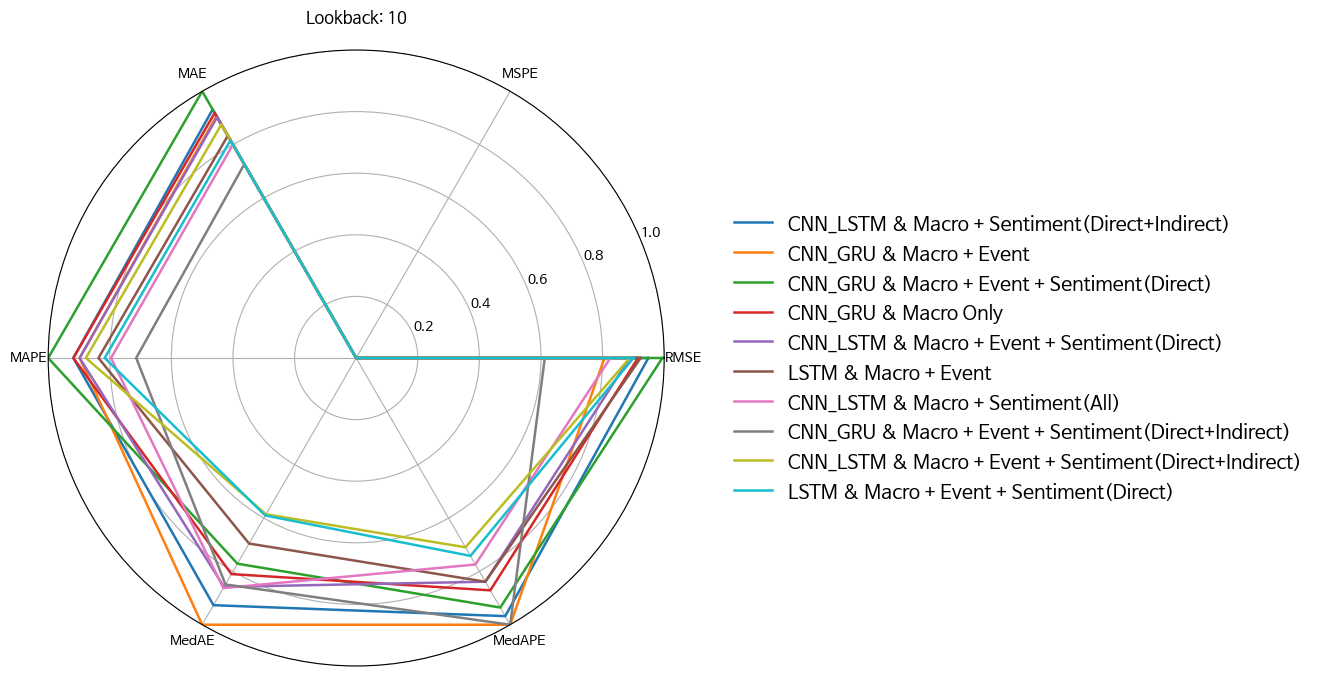

Top 10 by Radar Area:


,Model & Feature Case,Area of Radar
0,CNN_GRU & Macro + Event + Sentiment(Direct),1.6836
1,CNN_GRU & Macro + Event,1.6261
2,CNN_LSTM & Macro + Event + Sentiment(Direct),1.3762
3,LSTM & Macro + Event,1.3486
4,CNN_LSTM & Macro + Event + Sentiment(All),1.3478
5,LSTM & Macro + Event + Sentiment(Direct),1.2479
6,CNN_LSTM & Macro Only,1.2153
7,CNN_LSTM & Macro + Sentiment(Direct+Indirect),1.1432
8,CNN_GRU & Macro Only,1.1344
9,GRU & Macro Only,1.1281


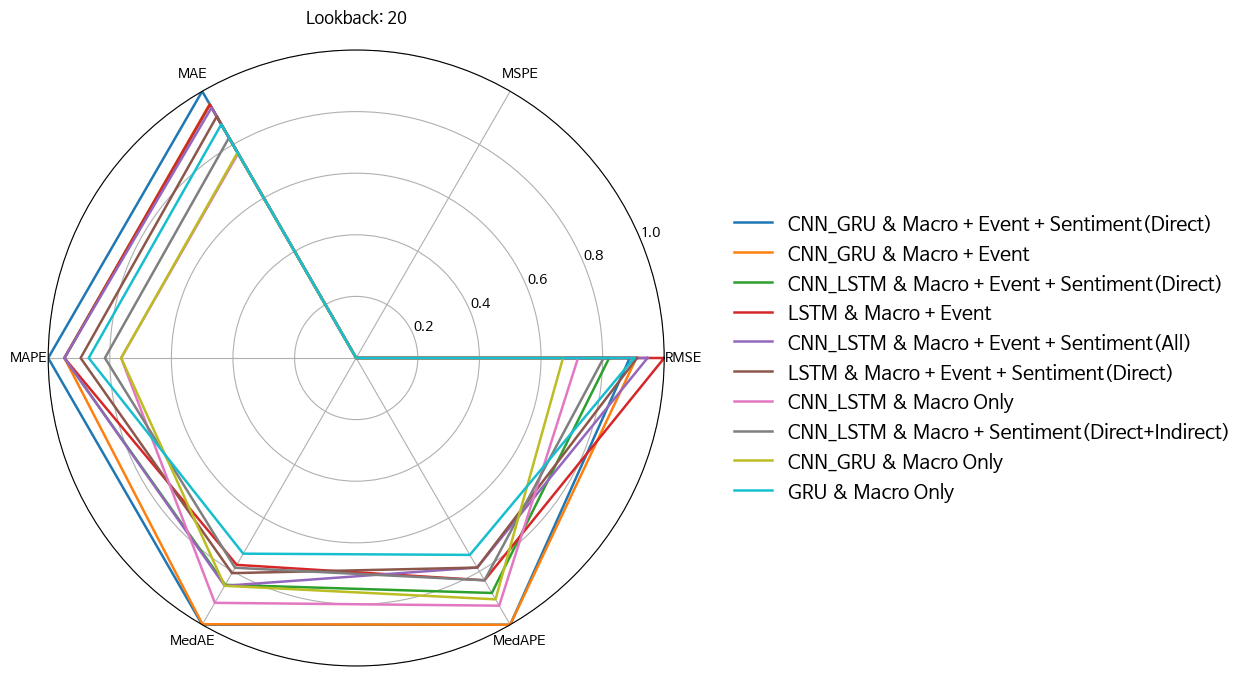

Top 10 by Radar Area:


,Model & Feature Case,Area of Radar
0,LSTM & Macro + Event + Sentiment(Direct),1.6463
1,CNN_LSTM & Macro + Event,1.5273
2,CNN_GRU & Macro + Event + Sentiment(Direct),1.5266
3,LSTM & Macro + Event,1.5236
4,CNN_LSTM & Macro Only,1.1495
5,CNN_LSTM & Macro + Sentiment(Direct),1.0761
6,CNN_GRU & Macro + Sentiment(All),1.0706
7,CNN_GRU & Macro + Sentiment(Direct+Indirect),1.0238
8,CNN_LSTM & Macro + Event + Sentiment(Direct),1.0225
9,CNN_LSTM & Macro + Event + Sentiment(Direct+Indirect),1.0068


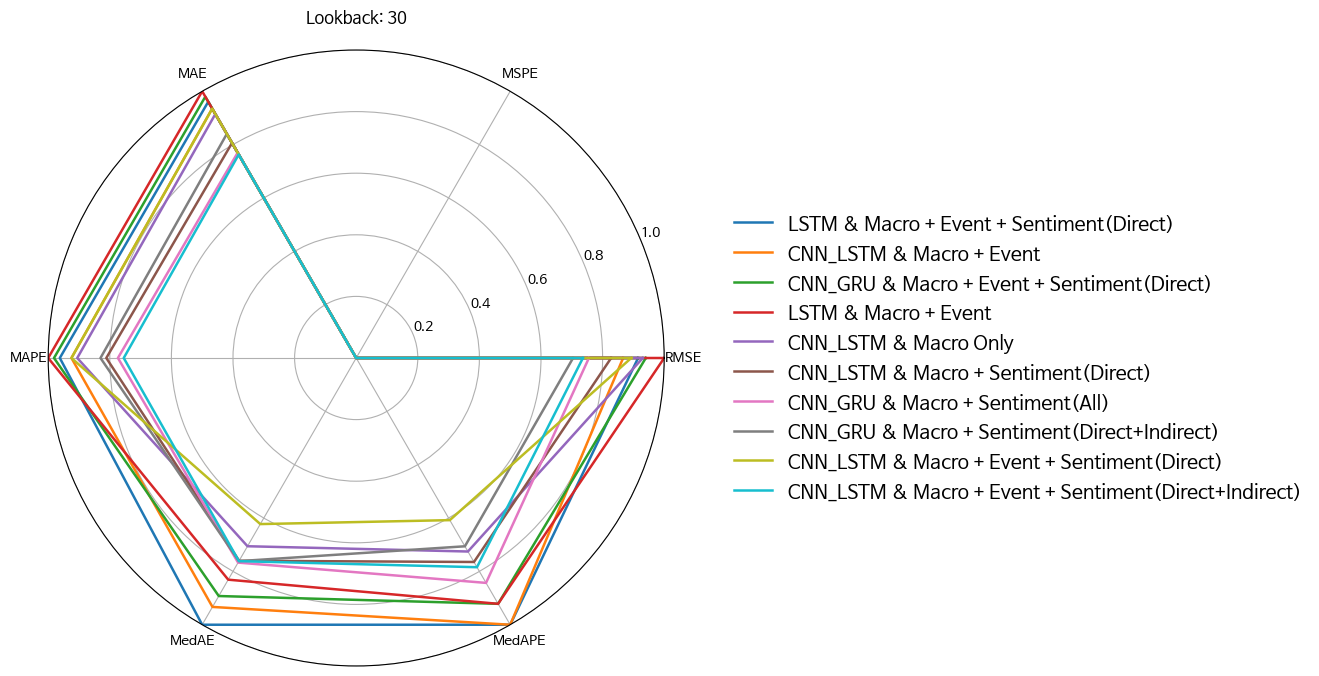

Top 10 by Radar Area:


,Model & Feature Case,Area of Radar
0,LSTM & Macro + Event,2.4712
1,LSTM & Macro + Event + Sentiment(All),2.4165
2,CNN_LSTM & Macro Only,2.3468
3,LSTM & Macro + Event + Sentiment(Direct+Indirect),2.2549
4,LSTM & Macro + Event + Sentiment(Direct),2.2381
5,LSTM & Macro + Sentiment(Direct),2.2181
6,CNN_LSTM & Macro + Event + Sentiment(Direct),2.2036
7,LSTM & Macro Only,2.1941
8,CNN_GRU & Macro + Event + Sentiment(Direct+Indirect),2.1264
9,CNN_LSTM & Macro + Sentiment(Direct+Indirect),2.0805


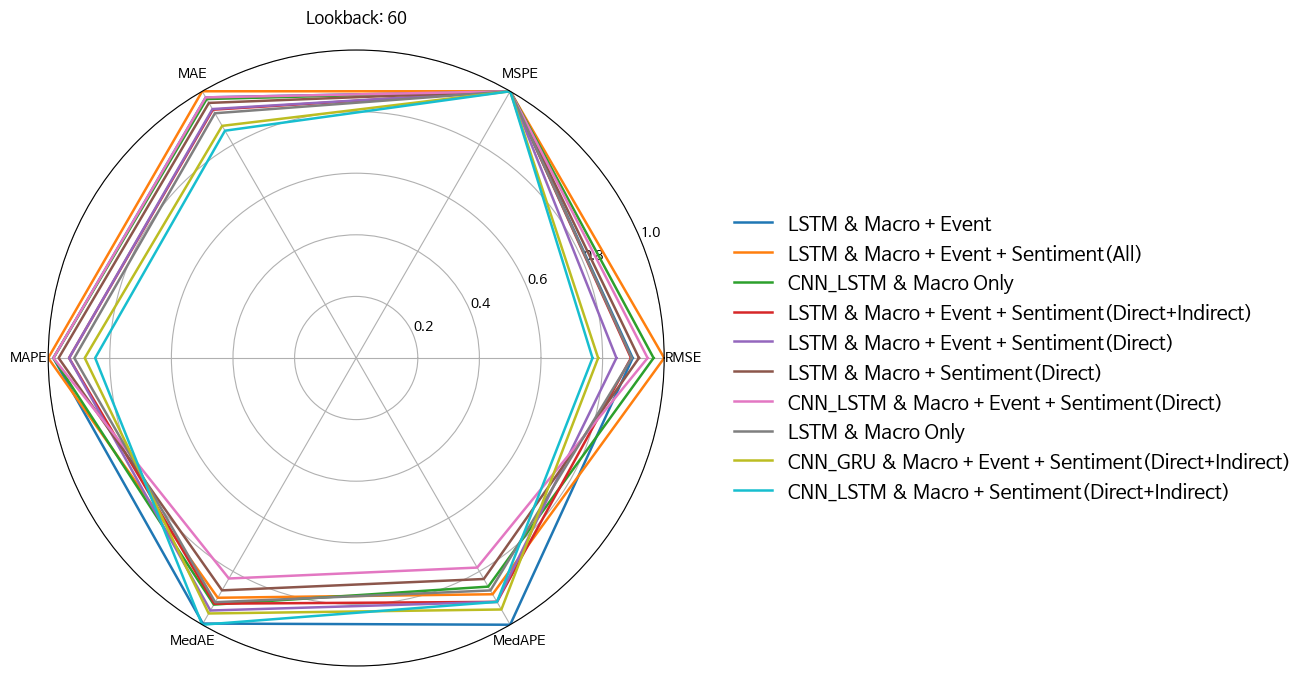

Top 10 by Radar Area:


,Model & Feature Case,Area of Radar
0,LSTM & Macro + Event,1.6167
1,LSTM & Macro + Event + Sentiment(All),1.3533
2,LSTM & Macro + Event + Sentiment(Direct+Indirect),1.3403
3,LSTM & Macro + Sentiment(Direct),1.2423
4,CNN_GRU & Macro + Event + Sentiment(Direct),1.2405
5,LSTM & Macro Only,1.2390
6,CNN_LSTM & Macro + Event,1.1743
7,CNN_LSTM & Macro + Event + Sentiment(Direct),1.1534
8,LSTM & Macro + Event + Sentiment(Direct),1.0776
9,CNN_GRU & Macro + Sentiment(Direct),1.0401


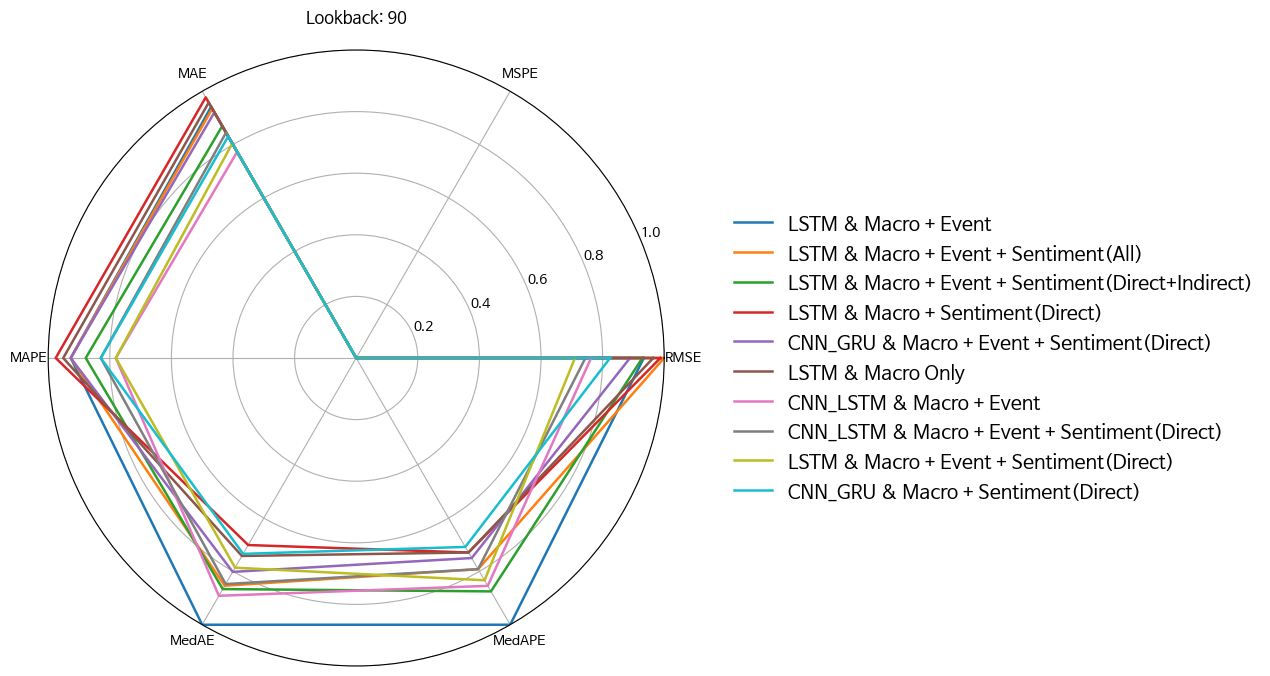

In [88]:
# Visualization
for lookback in df.Lookback.unique():
    df_sub = df[df.Lookback == lookback]
    plot_radarchart(df_sub, metric_colnames=METRIC_COLNAMES,
                    label_colname=LABEL_COLNAME, 
                    scaling=SCALING, top_ranking=TOP_RANKING,
                    title='Lookback: '+str(np.unique(df_sub.Lookback)[0]))